In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv


### **EDA & Preprocessing**

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [144]:
data = pd.read_csv("/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")
print(data.shape)
data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [146]:
data = data.replace('?', np.nan)

In [147]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [148]:
f_data = data

In [149]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [150]:
f_data = f_data.apply(pd.to_numeric, errors='coerce')


In [151]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

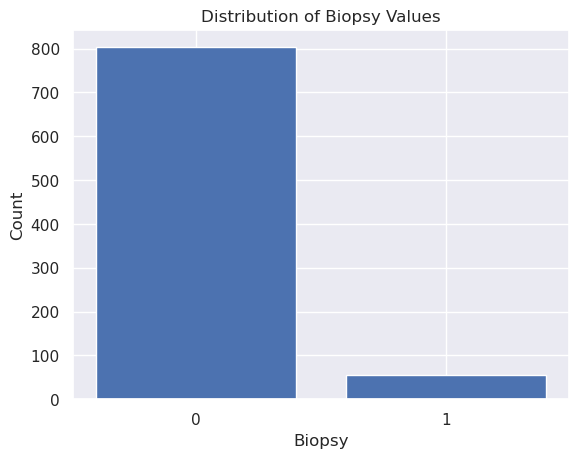

In [152]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'biopsy' column
biopsy_counts = f_data['Biopsy'].value_counts()

# Create a bar plot
plt.bar(biopsy_counts.index, biopsy_counts.values)
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.title('Distribution of Biopsy Values')
plt.xticks([0, 1])
plt.show()


**#imbalanced data indeed**

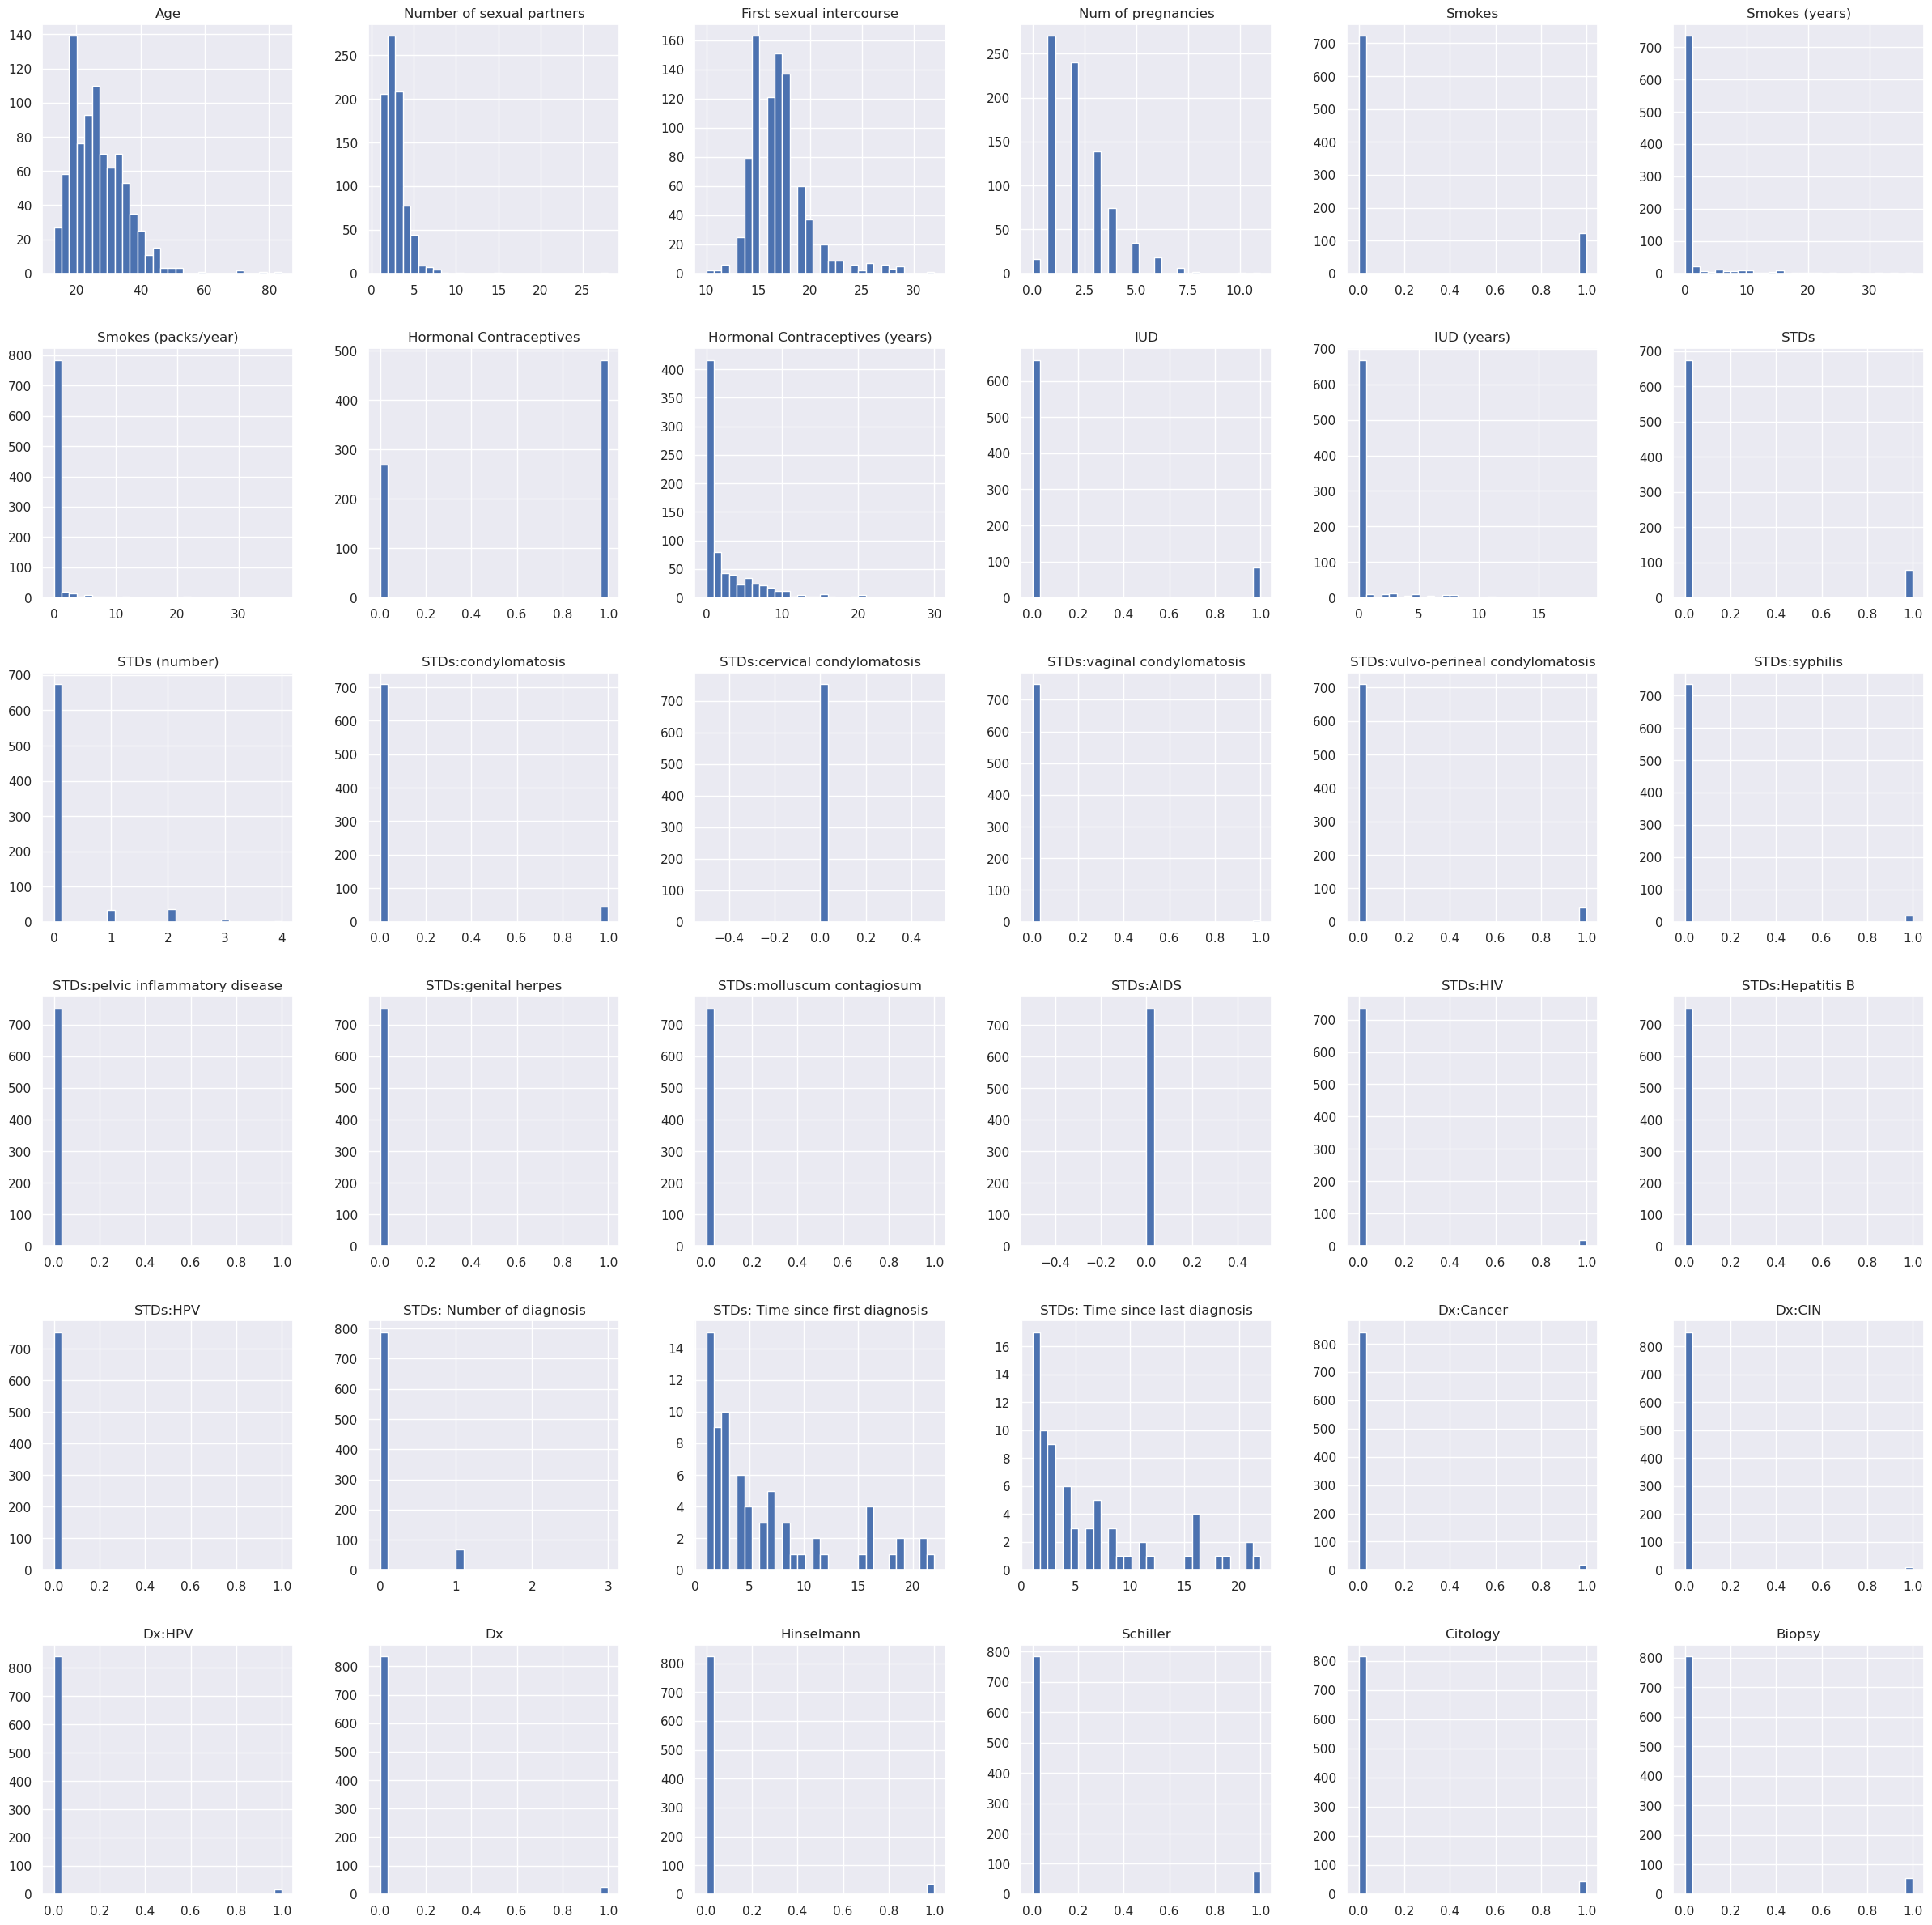

In [153]:
f_data[f_data.columns].hist(bins=30, figsize=(30,30))
plt.show()

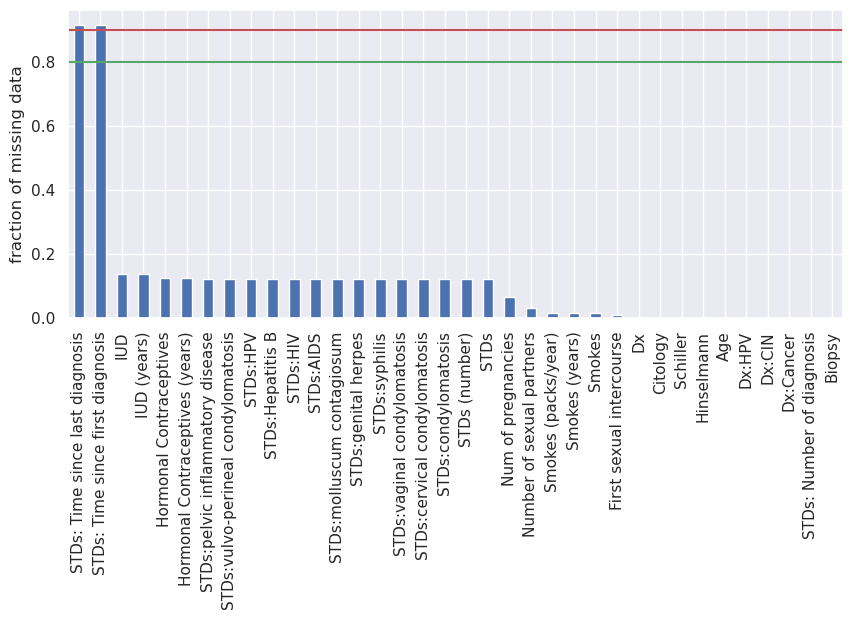

In [154]:
f_data[f_data.columns].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel("fraction of missing data")
plt.axline(xy1=(0, 0.9), slope=0, color='r', linestyle="-")
plt.axline(xy1=(0, 0.8), slope=0, color='g', linestyle="-")
plt.show()

In [155]:
drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
for var in drop:
    f_data.drop(var , axis = 1 , inplace = True)

In [156]:
f_data.shape

(858, 34)

<Axes: >

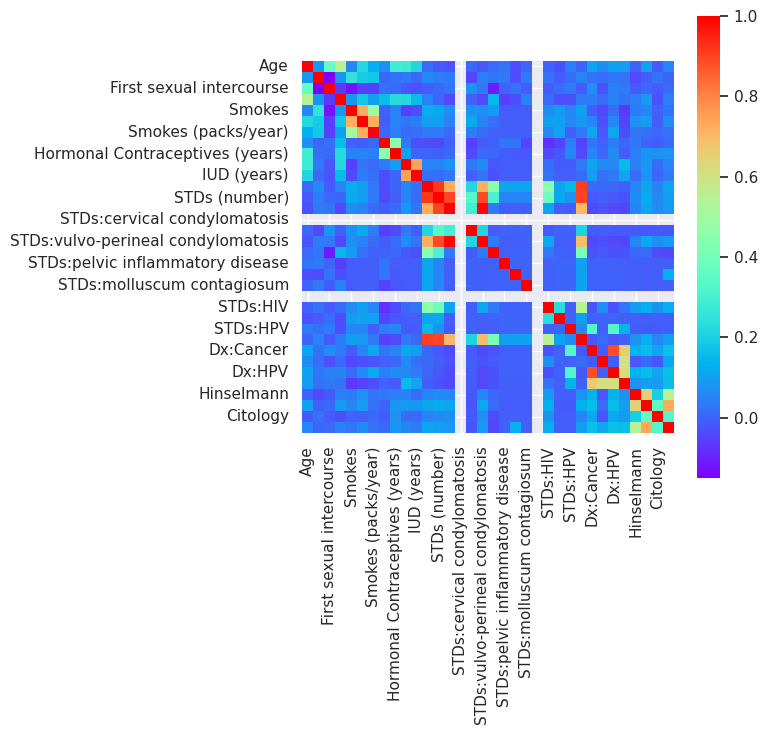

In [157]:
corrmat = f_data.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

* **very less correlation**

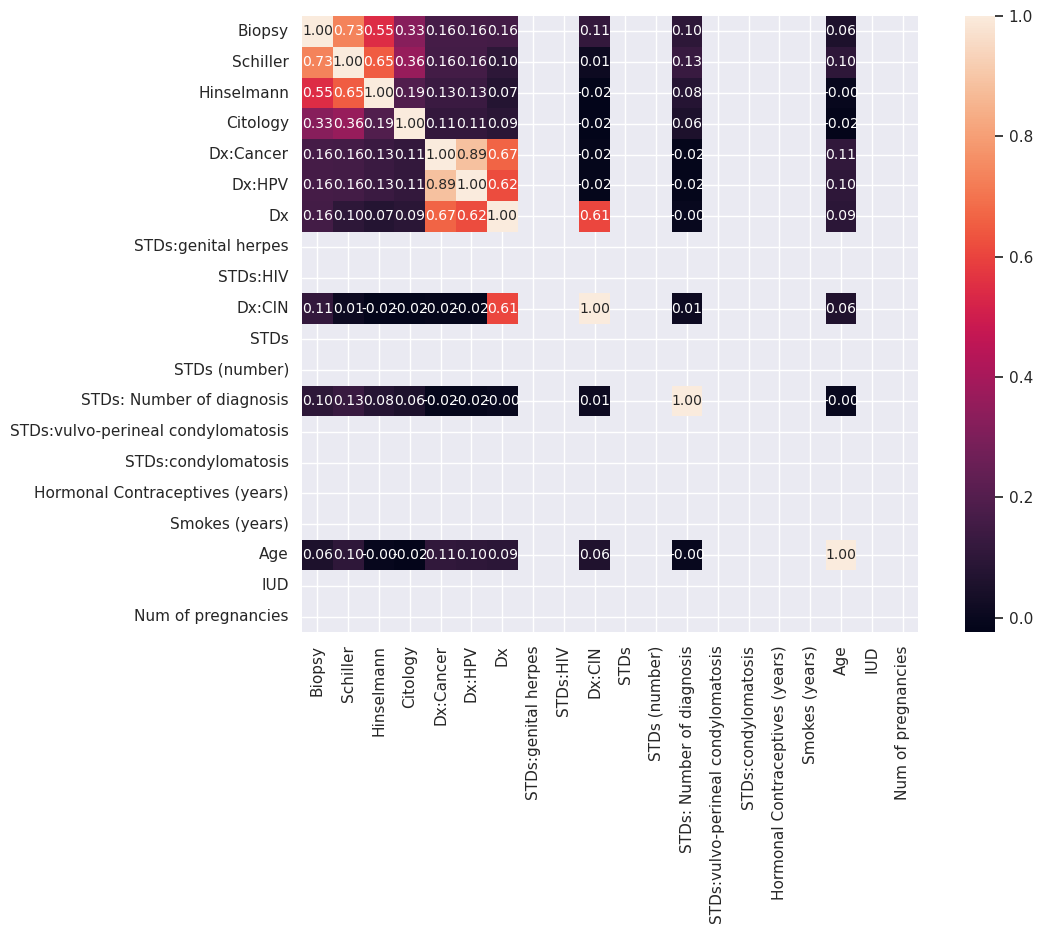

In [158]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(f_data[cols].values.T)

plt.figure(figsize=(12,8)) 

sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()


## ***Null values***

In [159]:
# for categorical variable
cat = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller']

f_data = pd.get_dummies(data=f_data, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [160]:
#for continuous variable
for var in f_data.columns:
    if var not in cat:
        f_data[var] = f_data[var].fillna(f_data[var].median())

In [161]:
f_data.isnull().sum() #No null left~

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Biopsy                                0
Smokes_0.0                            0
Smokes_1.0                            0


In [162]:
import warnings
warnings.filterwarnings('ignore')

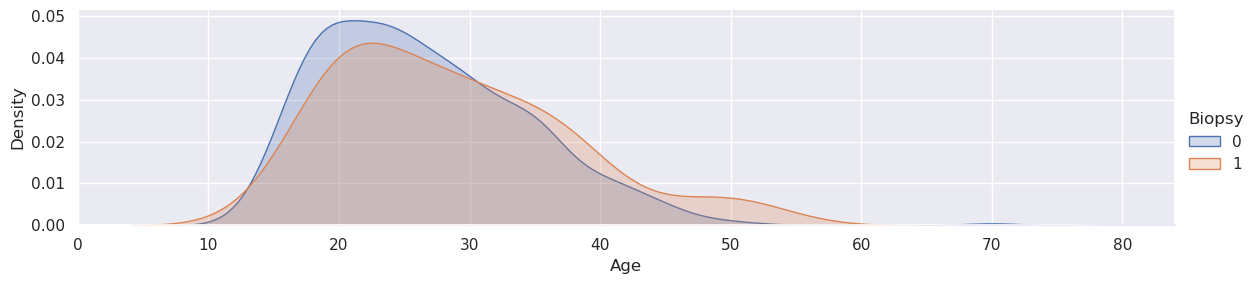

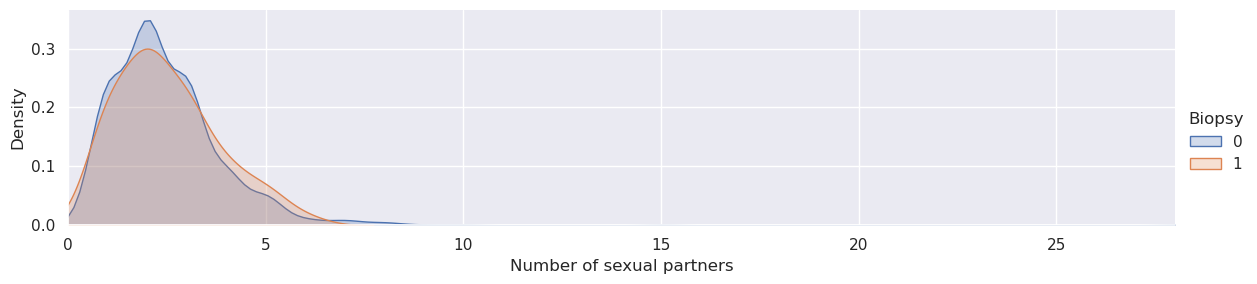

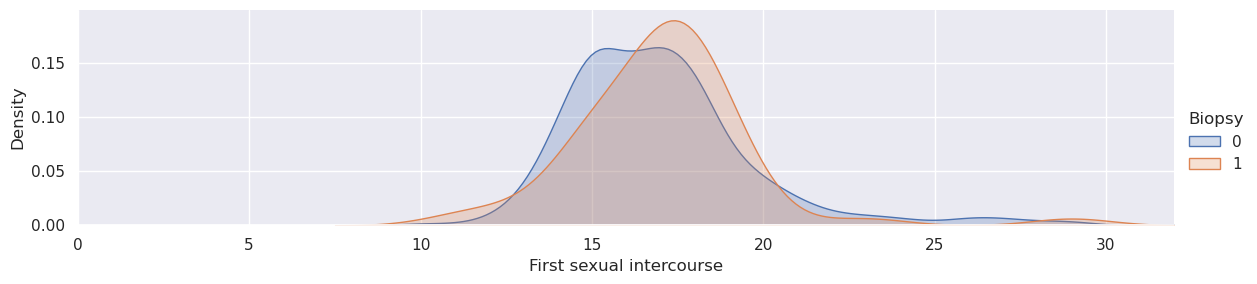

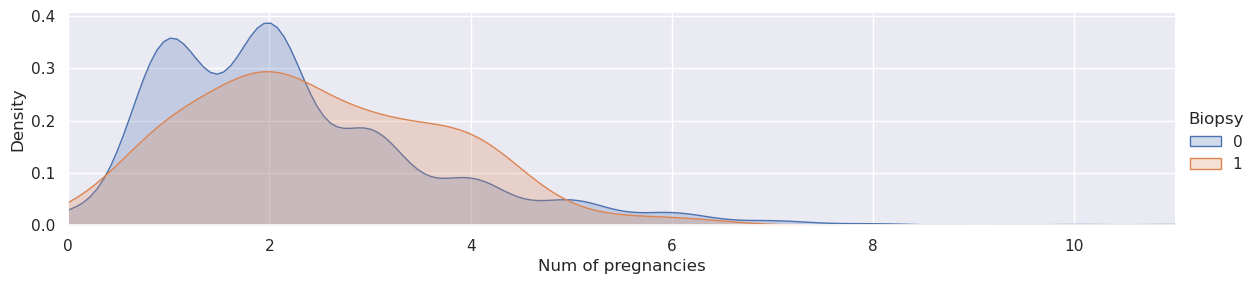

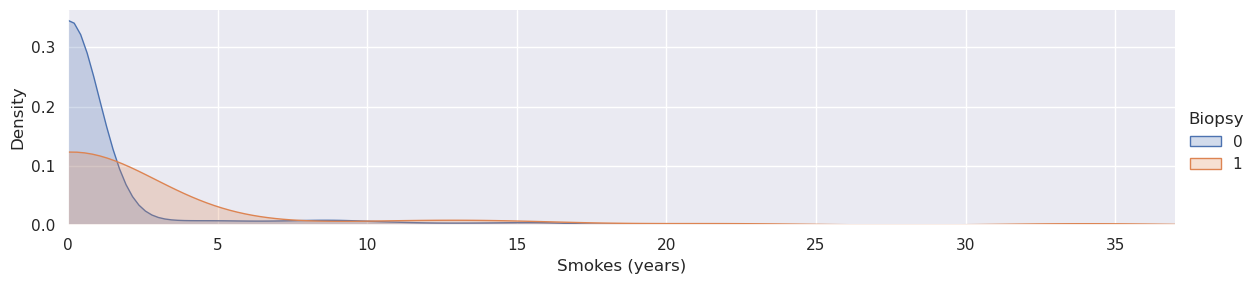

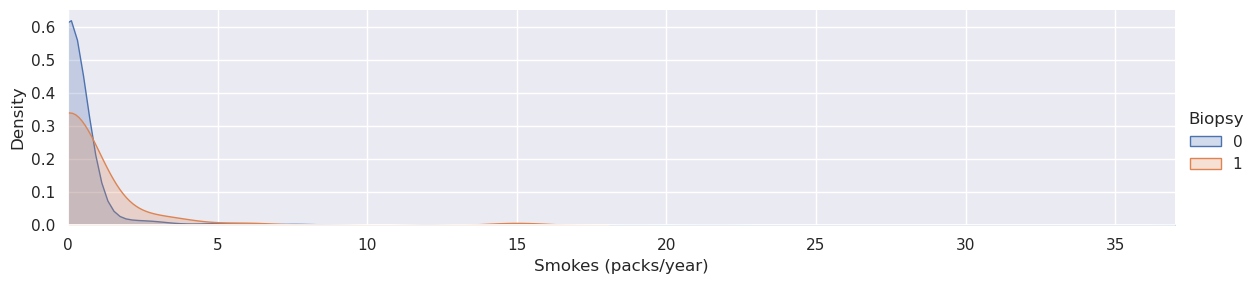

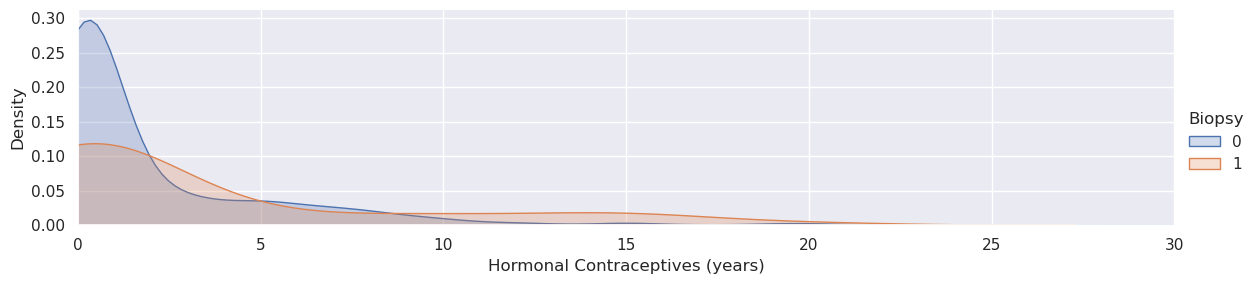

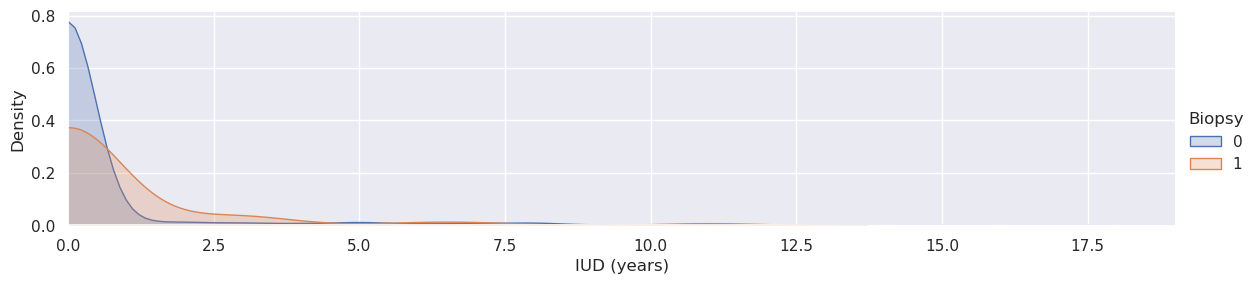

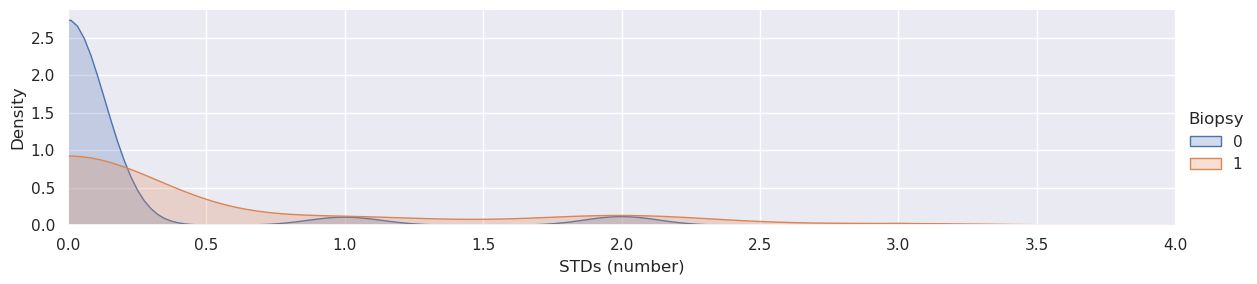

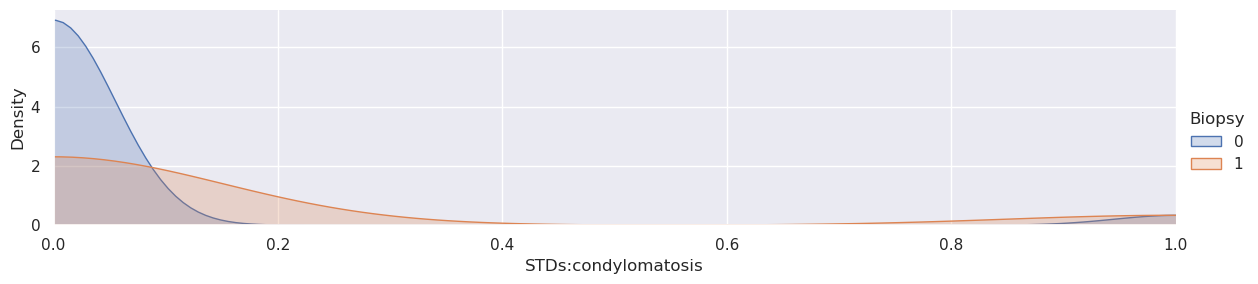

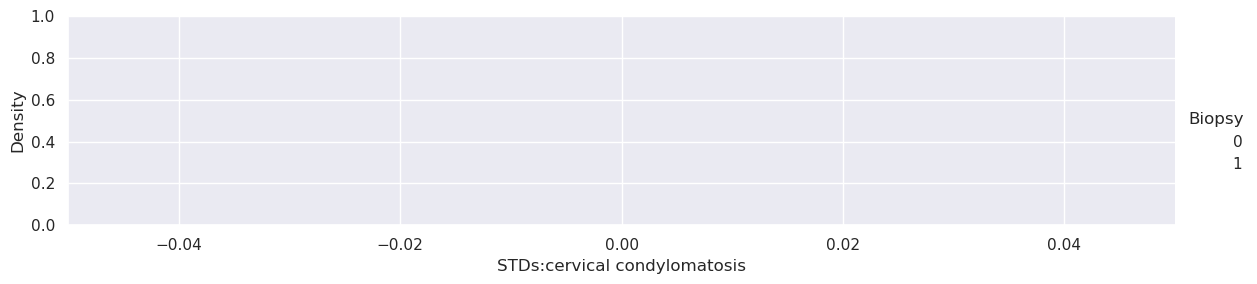

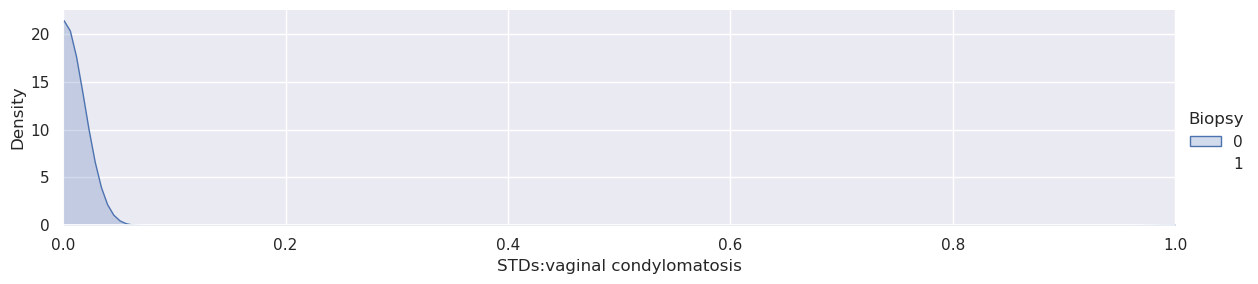

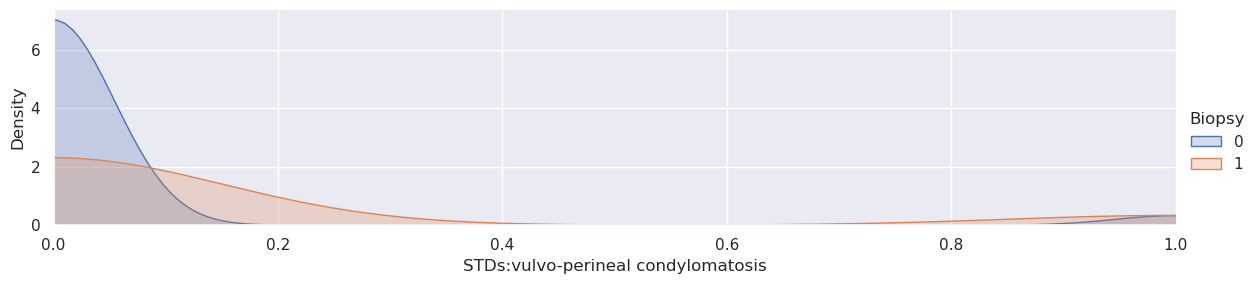

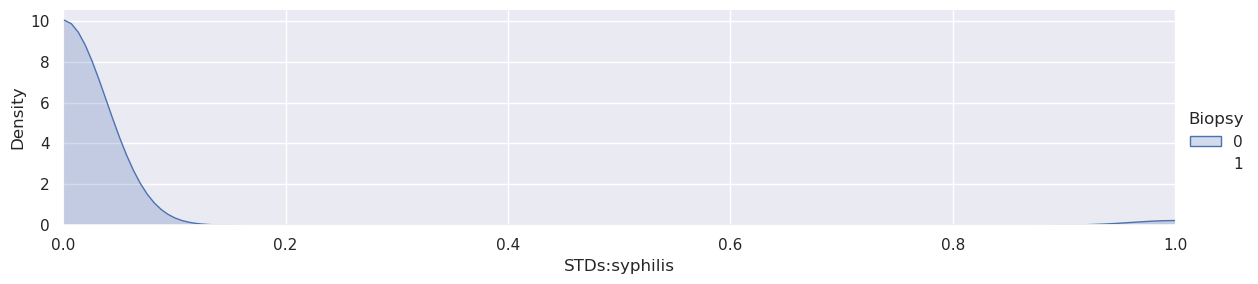

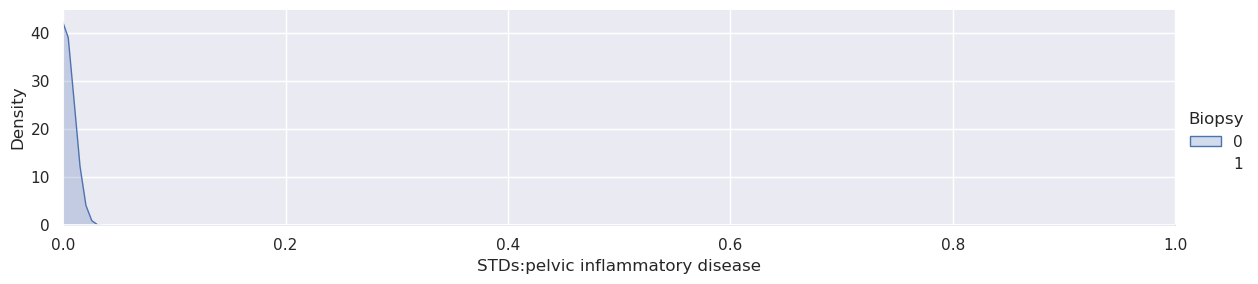

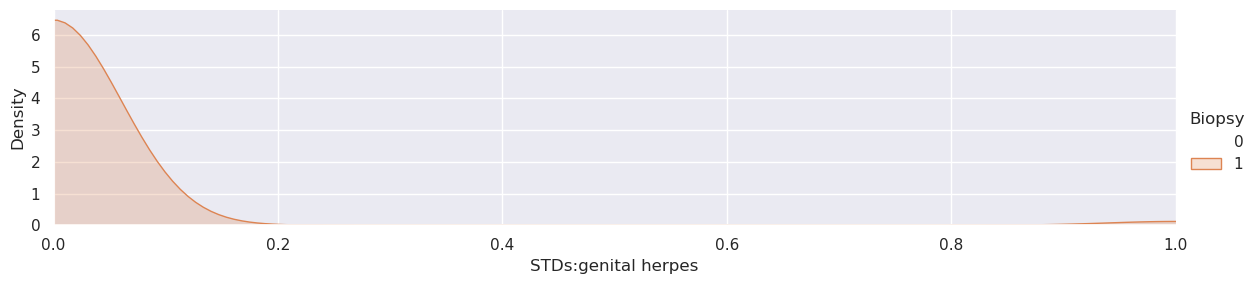

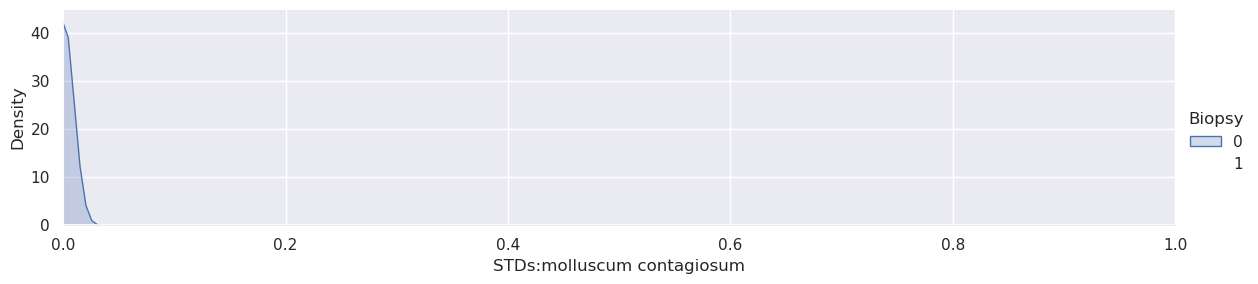

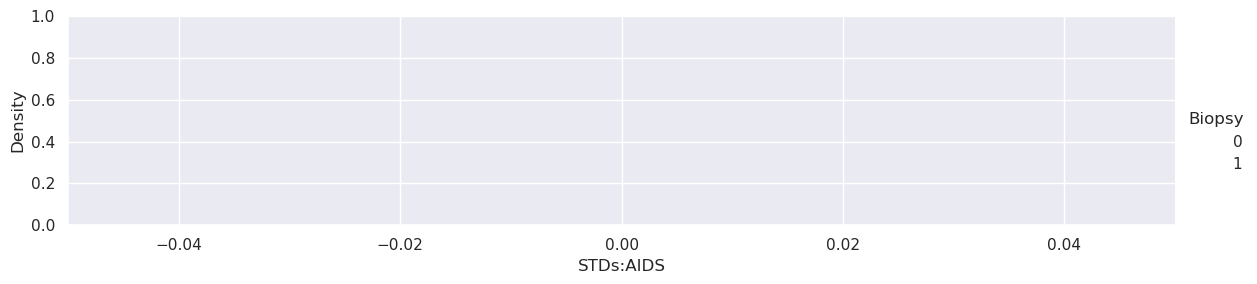

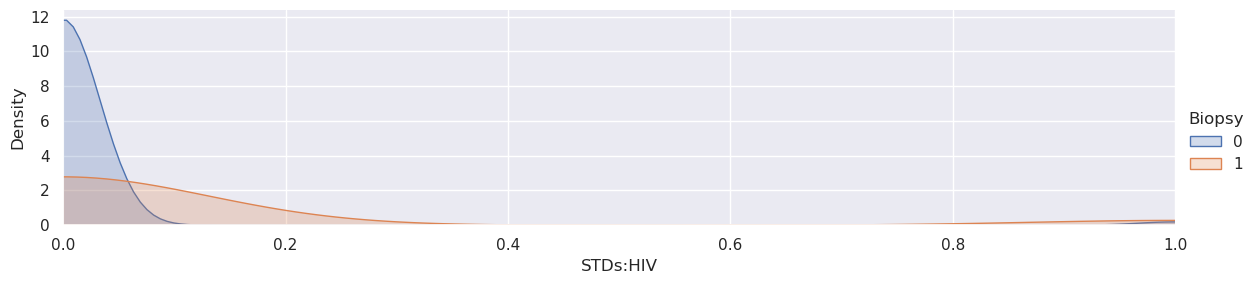

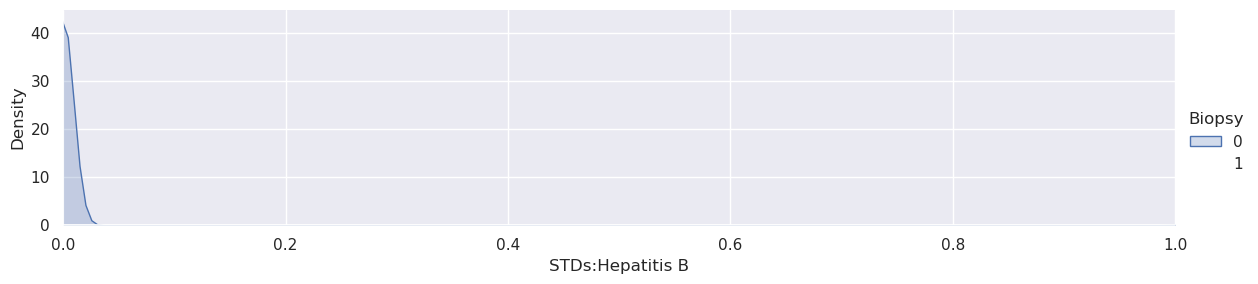

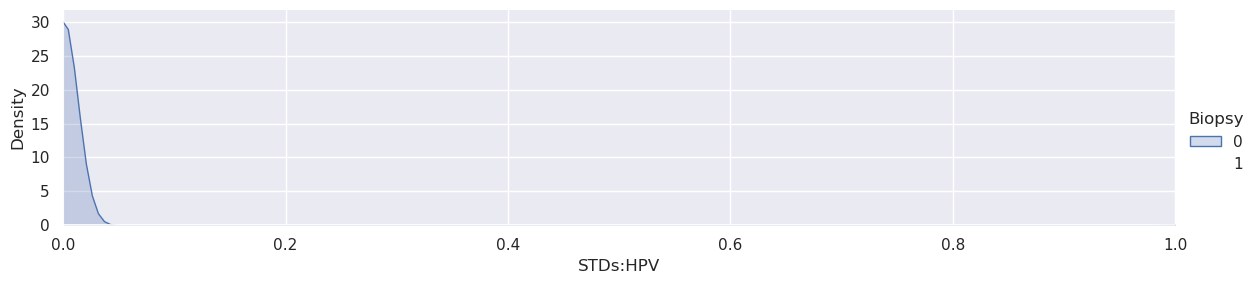

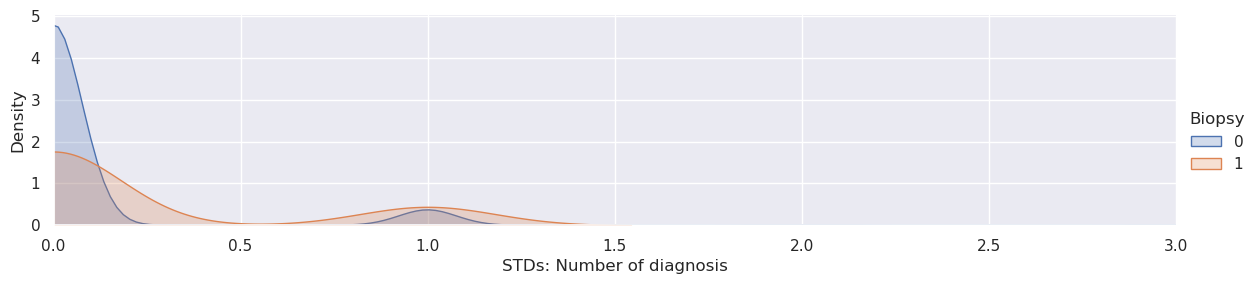

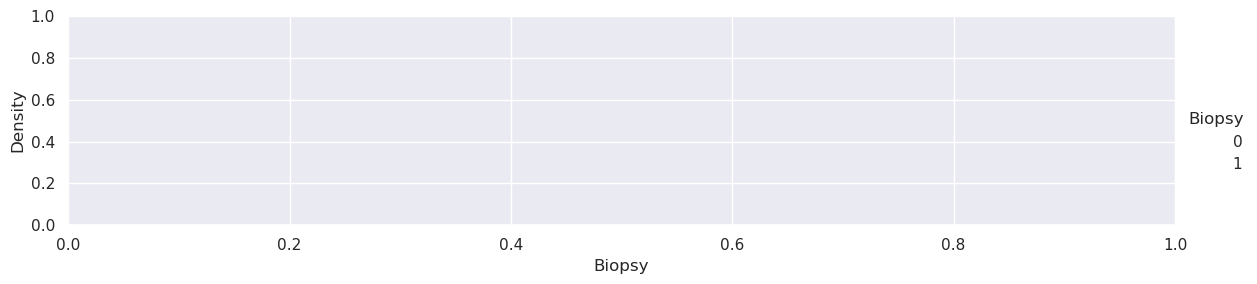

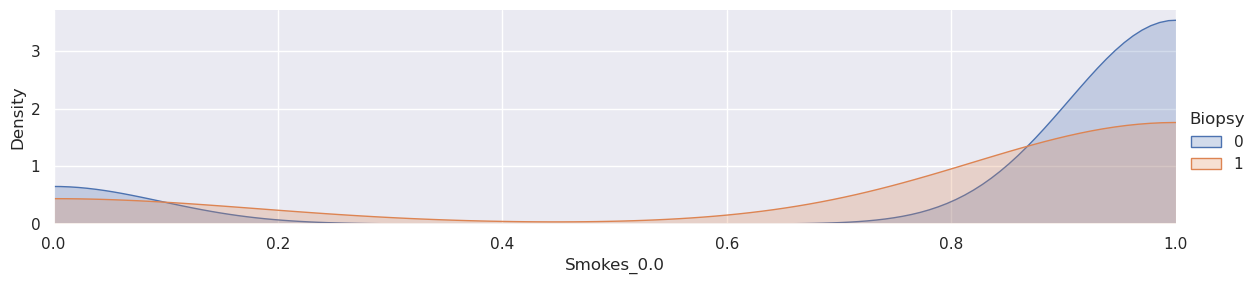

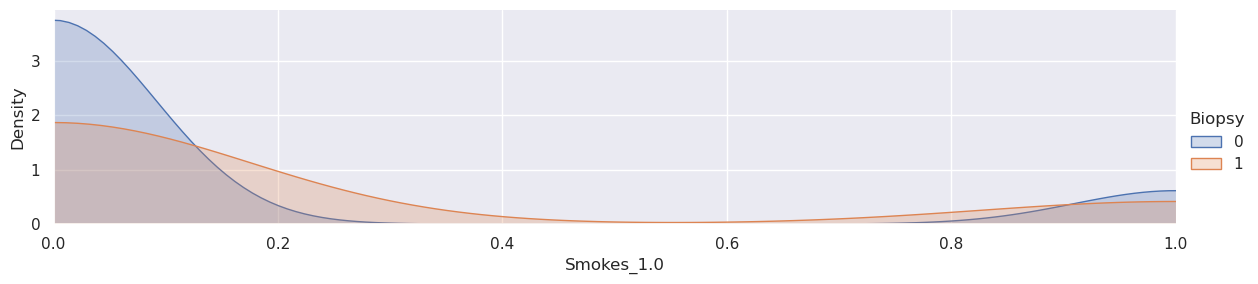

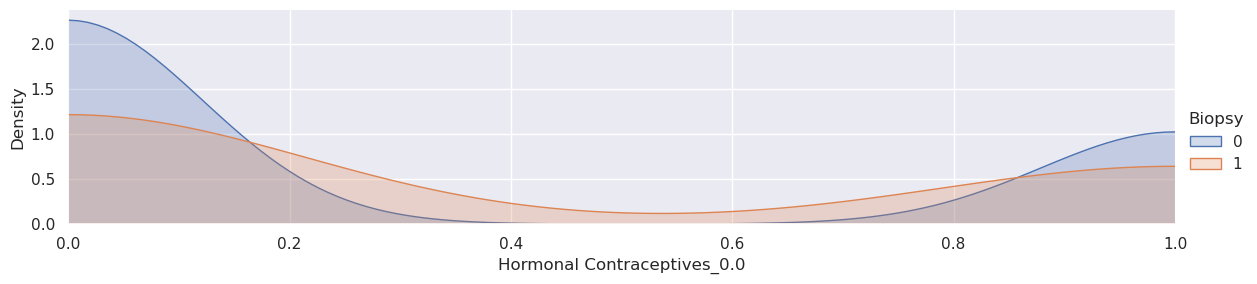

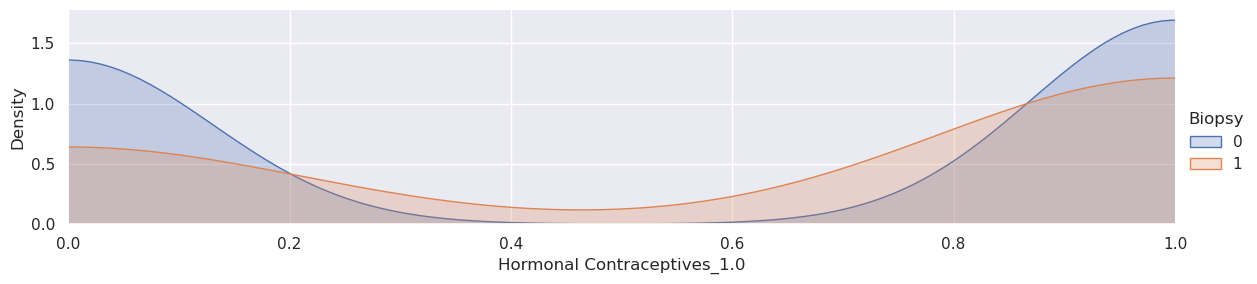

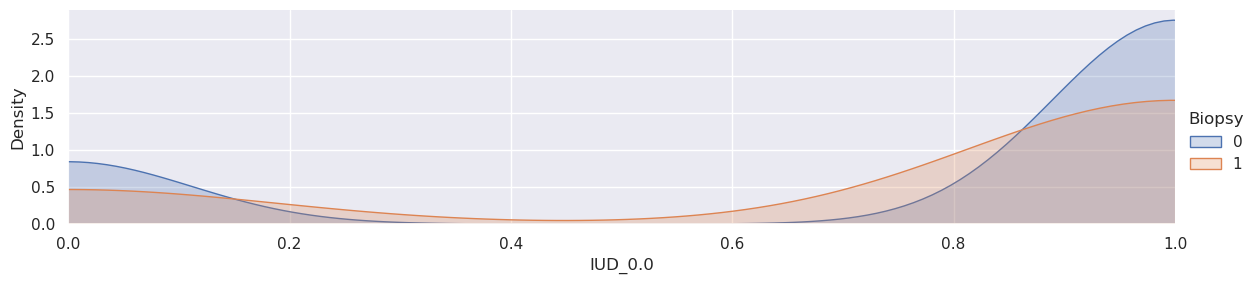

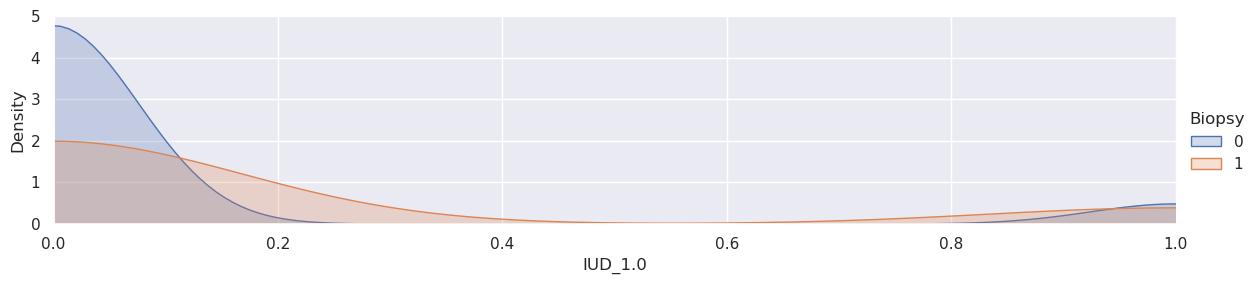

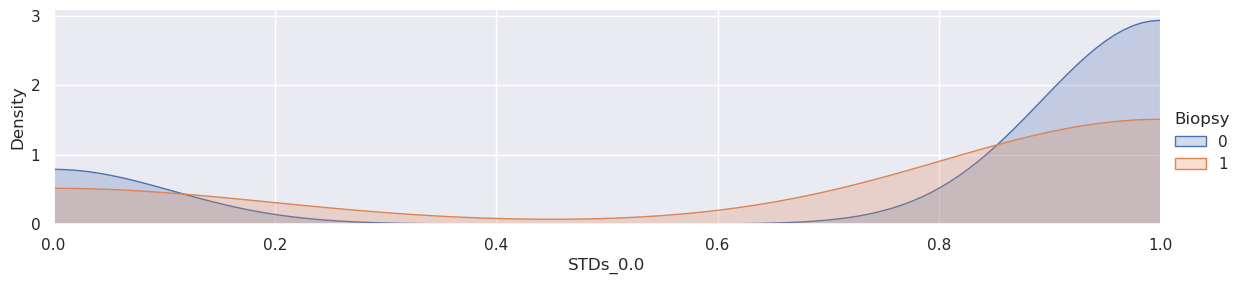

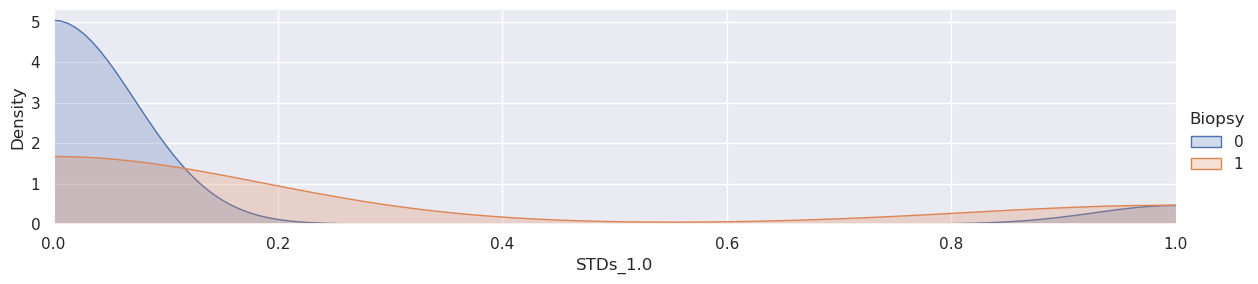

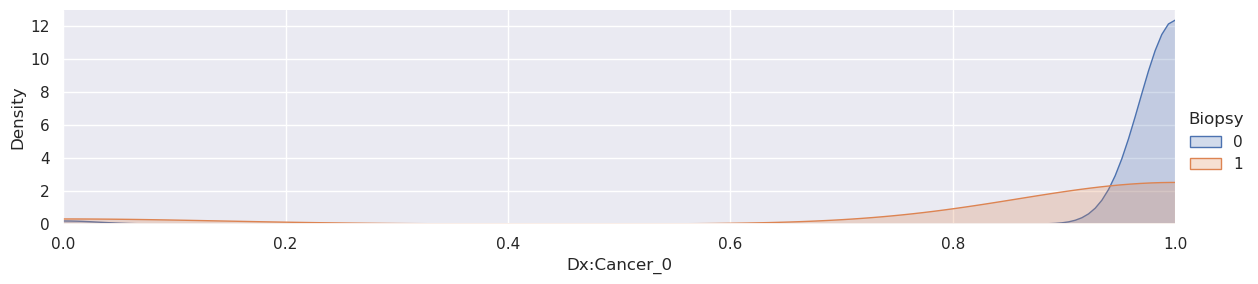

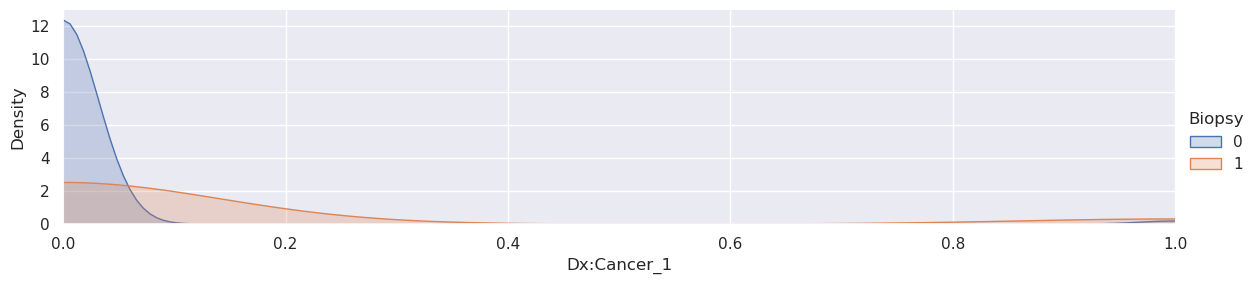

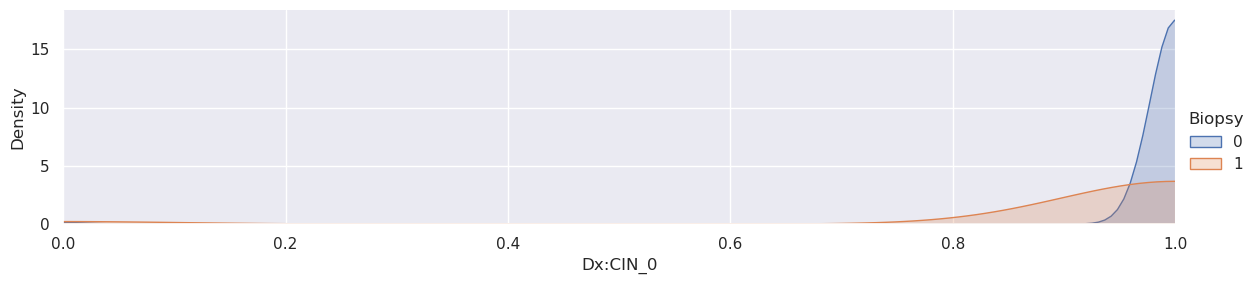

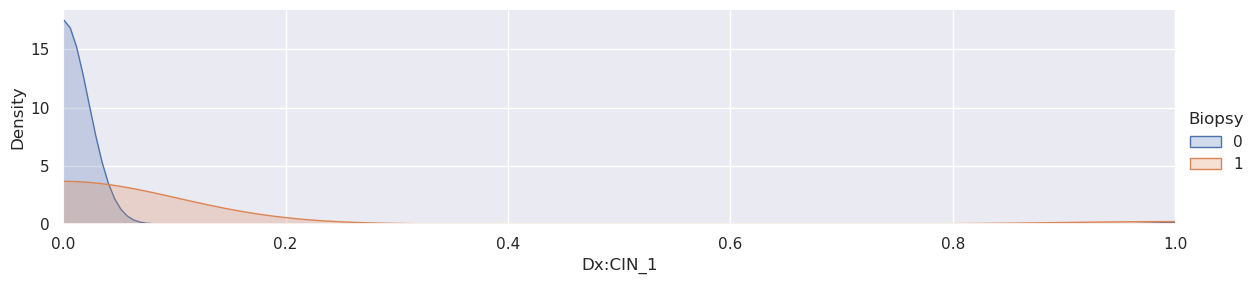

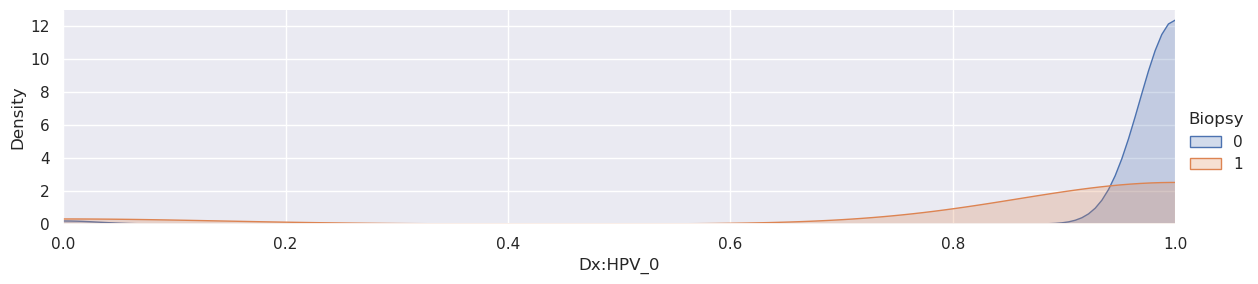

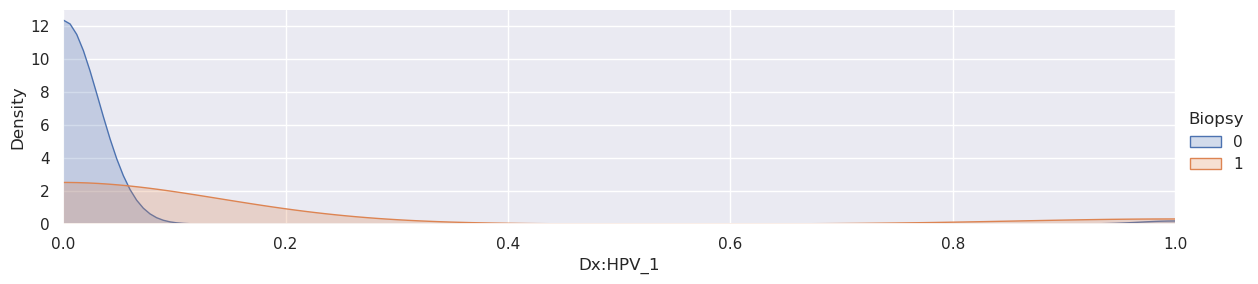

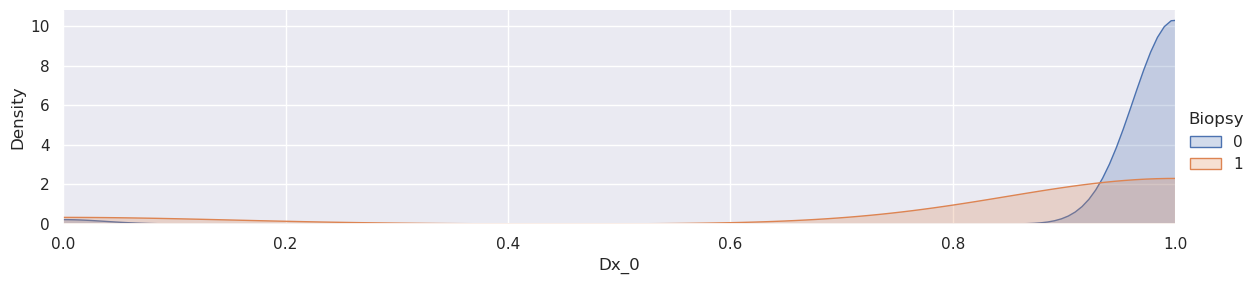

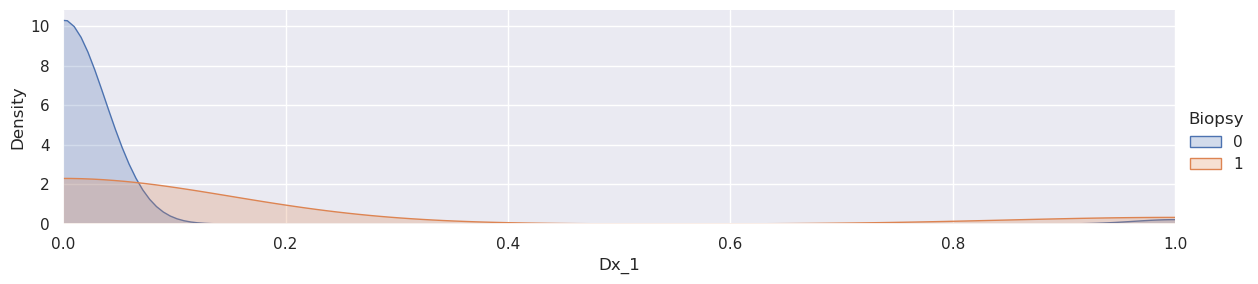

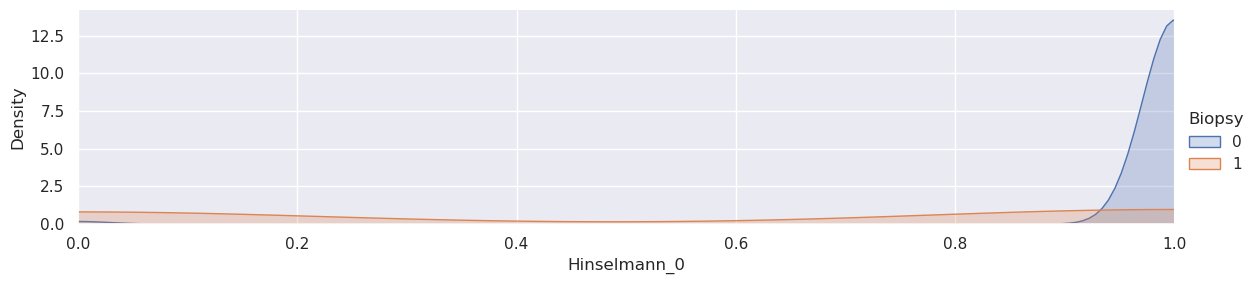

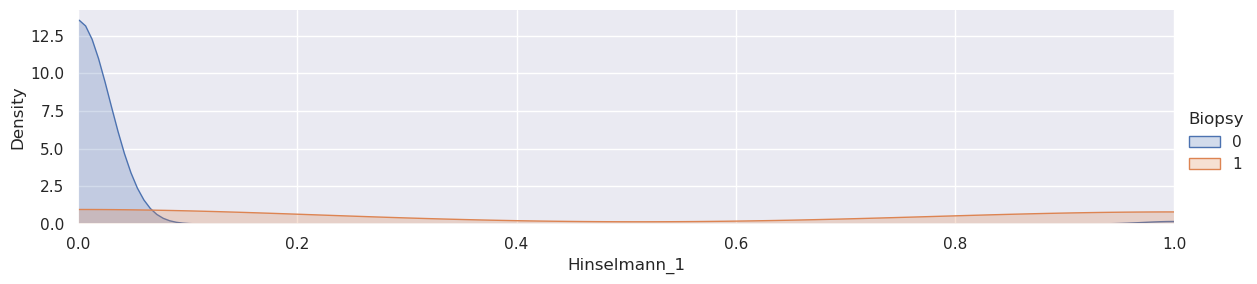

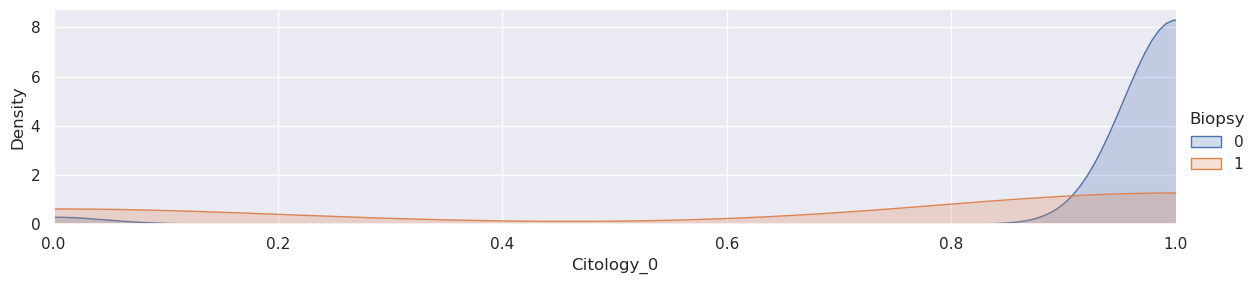

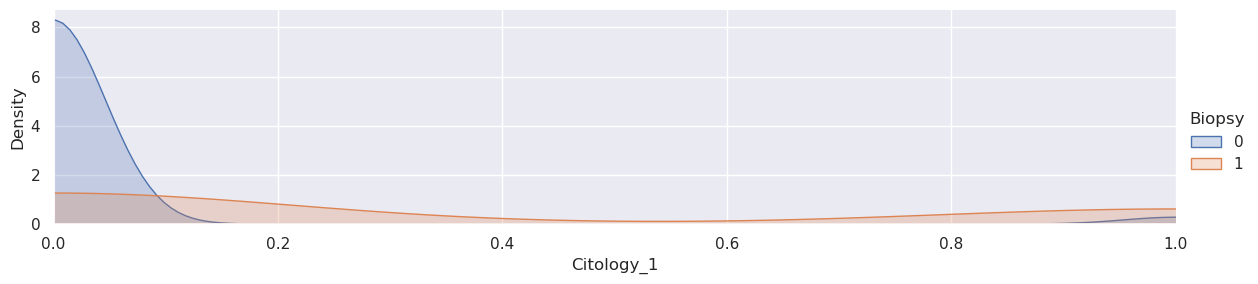

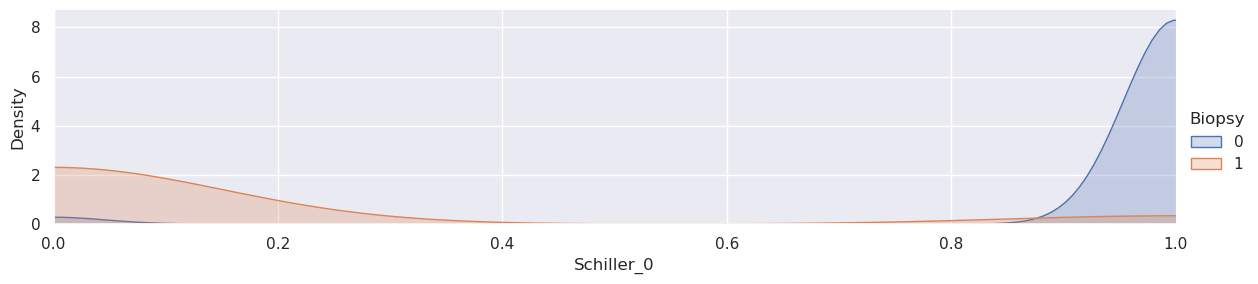

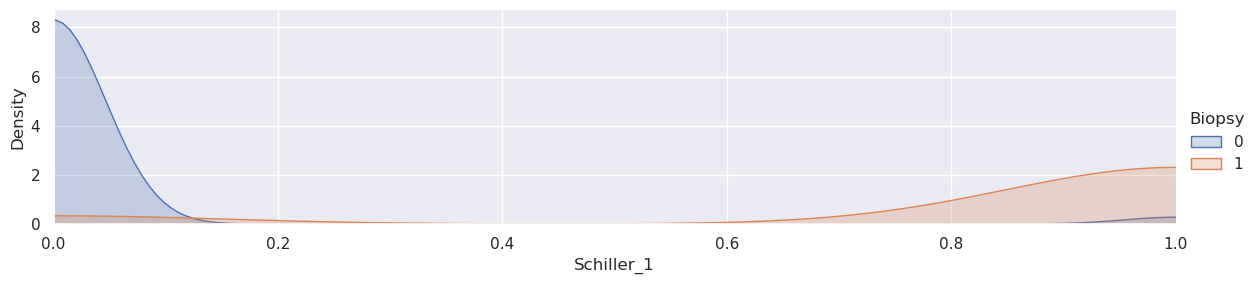

In [163]:
for var in f_data.columns:
    facet = sns.FacetGrid(f_data, hue='Biopsy',aspect=4)
    facet.map(sns.kdeplot,var,fill= True)
    facet.set(xlim=(0, f_data[var].max()))
    facet.add_legend()

# Splitting data

In [164]:
X = f_data.drop('Biopsy', axis = 1)
y = f_data["Biopsy"]

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(686, 44)
(686,)
(172, 44)
(172,)


## **SMOTE for making the data balanced**

In [166]:
from imblearn.over_sampling import SMOTE


In [167]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## **Normalizing the data**

In [168]:
from sklearn import preprocessing

# Create an instance of MinMaxScaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Normalize the training feature data
X_train_normalized = minmax_scale.fit_transform(X_train_resampled)

# Normalize the test feature data
X_test_normalized = minmax_scale.transform(X_test)


In [169]:
print(X_train_normalized.shape)
print(X_test_normalized.shape)

(1284, 44)
(172, 44)


In [177]:
print(y_train_resampled.shape)
print(y_test.shape)

(1284,)
(172,)


## **PCA**

In [170]:
from sklearn.decomposition import PCA


## Determining the number of components for PCA  

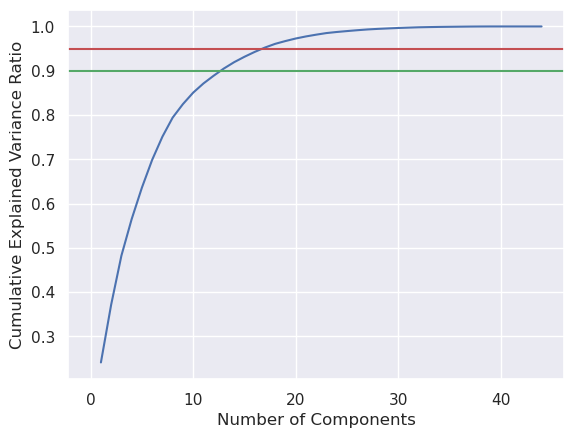

In [171]:


# Fit PCA on the normalized training feature data
pca = PCA()
pca.fit(X_train_normalized)

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axline(xy1=(0, 0.95), slope=0, color='r', linestyle="-")
plt.axline(xy1=(0, 0.9), slope=0, color='g', linestyle="-")
plt.grid(True)
plt.show()


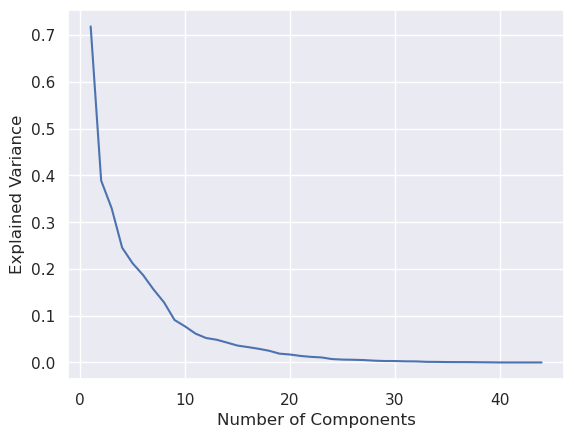

In [172]:
explained_variance = pca.explained_variance_
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()


In [188]:


# Create an instance of PCA with the desired number of components
pca = PCA(n_components=23)  

# Fit PCA on the normalized training feature data and transform it
X_train_pca = pca.fit_transform(X_train_normalized)

# Transform the normalized test feature data using the fitted PCA
X_test_pca = pca.transform(X_test_normalized)


In [178]:
print(X_train_pca.shape)
print(y_train_resampled.shape)

(1284, 17)
(1284,)


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_pca,y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 , "%")


Accuracy: 94.76744186046511 %
